## 네이버쇼핑과 날씨와의 관계
### 1. 데이터 로딩

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pymysql
import pandas as pd

conn = pymysql.connect(host='multi-bigdata.cljkqcsbb9ok.ap-northeast-2.rds.amazonaws.com',port=3306,user='edu02',passwd='edu02', db='edudb01', cursorclass=pymysql.cursors.DictCursor)
try:
    cur = conn.cursor()
    sql = '''
        SELECT A.productcid
                ,A.productcname
                ,A.level
                ,A.productpath
                ,B.dt
                ,B.productvalue

        FROM NaverShopProductCode2 AS A
        INNER JOIN NaverShopProductRate AS B
        ON A.productcid = B.productcid
        WHERE 1 = 1
        AND B.dt BETWEEN '20181101' AND '20191031'         
--        AND B.dt BETWEEN '20191101' AND '20201031'

    '''
    cur.execute(sql)
    result_naverShopping = cur.fetchall()
finally:
    conn.close()
print('마리아에서 불러온 행 수 :', len(result_naverShopping))

마리아에서 불러온 행 수 : 880047


In [3]:
conn = pymysql.connect(host='multi-bigdata.cljkqcsbb9ok.ap-northeast-2.rds.amazonaws.com',port=3306,user='edu02',passwd='edu02', db='edudb01', cursorclass=pymysql.cursors.DictCursor)
try:
    cur = conn.cursor()
    sql = '''
        SELECT *

        FROM ASOS_Weather_D
        WHERE 1 = 1
        AND DATE BETWEEN '2018-11-01' AND '2019-10-31'         
--        AND DATE BETWEEN '2019-11-01' AND '2020-10-31'

    '''
    cur.execute(sql)
    result_weather = cur.fetchall()
finally:
    conn.close()
print('마리아에서 불러온 행 수 :', len(result_weather))

마리아에서 불러온 행 수 : 5994


In [4]:
# 기간 : 20191101 ~ 20201031
naverShopping = pd.DataFrame(result_naverShopping)
dtweather = pd.DataFrame(result_weather)
dtweather.rename(columns = {'date' : 'dt'}, inplace = True)

In [5]:
# display(naverShopping.describe(include='all'))
# display(dtweather.describe(include='all'))

In [6]:
# 날짜 format 맞추기
naverShopping['newdt'] = naverShopping['dt'].apply(lambda x : x[0:4] + '-' + x[4:6] + '-' + x[6:8])  
display(naverShopping.head(2))
del naverShopping['dt']
naverShopping.rename(columns = {'newdt' : 'dt'}, inplace = True)
display(naverShopping.head(2))

,productcid,productcname,level,productpath,dt,productvalue,newdt
0,50000000,패션의류,L1,패션의류,20181101,85.3540,2018-11-01
1,50000001,패션잡화,L1,패션잡화,20181101,58.6638,2018-11-01


,productcid,productcname,level,productpath,productvalue,dt
0,50000000,패션의류,L1,패션의류,85.3540,2018-11-01
1,50000001,패션잡화,L1,패션잡화,58.6638,2018-11-01


In [7]:
# naverShopFaFo = naverShopping[naverShopping['productcname'].isin(['패션의류', '식품'])] 
# naverShopFaFo = naverShopping[naverShopping['level'].isin(['L2'])]
naverShopFaFo = naverShopping
# naverShopFaFo = naverShopping[naverShopping['level'].isin(['L2']) & naverShopping['productcname'].isin(['향수'])] 
print(naverShopFaFo.head())
print(naverShopFaFo.count())


print(naverShopFaFo.info())

  productcid productcname level productpath  productvalue          dt
0   50000000         패션의류    L1        패션의류       85.3540  2018-11-01
1   50000001         패션잡화    L1        패션잡화       58.6638  2018-11-01
2   50000002       화장품/미용    L1      화장품/미용       71.2651  2018-11-01
3   50000003       디지털/가전    L1      디지털/가전       71.5439  2018-11-01
4   50000004      가구/인테리어    L1     가구/인테리어       72.0787  2018-11-01
productcid      880047
productcname    880047
level           880047
productpath     880047
productvalue    880047
dt              880047
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880047 entries, 0 to 880046
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   productcid    880047 non-null  object 
 1   productcname  880047 non-null  object 
 2   level         880047 non-null  object 
 3   productpath   880047 non-null  object 
 4   productvalue  880047 non-null  float64
 5   dt    

In [8]:
naverShop = naverShopFaFo.pivot(index='dt', columns='productpath', values='productvalue')
display(naverShop.head())
display(naverShop.tail())
display(naverShop.count())


productpath,가구/인테리어,가구/인테리어 > DIY자재/용품,가구/인테리어 > DIY자재/용품 > 가구부속품,가구/인테리어 > DIY자재/용품 > 데코스티커,가구/인테리어 > DIY자재/용품 > 목재,가구/인테리어 > DIY자재/용품 > 몰딩,가구/인테리어 > DIY자재/용품 > 바닥재,가구/인테리어 > DIY자재/용품 > 반제품,가구/인테리어 > DIY자재/용품 > 벽지,가구/인테리어 > DIY자재/용품 > 손잡이,...,화장품/미용 > 헤어케어,화장품/미용 > 헤어케어 > 두피케어,화장품/미용 > 헤어케어 > 린스,화장품/미용 > 헤어케어 > 샴푸,화장품/미용 > 헤어케어 > 탈모케어,화장품/미용 > 헤어케어 > 트리트먼트,화장품/미용 > 헤어케어 > 헤어미스트,화장품/미용 > 헤어케어 > 헤어에센스,화장품/미용 > 헤어케어 > 헤어케어세트,화장품/미용 > 헤어케어 > 헤어팩
dt,,,,,,,,,,,,,,,,,,,,,
2018-11-01,72.0787,92.8073,65.6798,97.6212,77.0726,60.4663,63.6696,54.6898,100.0000,67.4987,...,65.5992,33.7352,54.0078,85.6928,10.35590,61.4510,27.0211,61.7787,24.1213,41.4314
2018-11-02,63.8732,67.3584,61.3935,68.8464,68.2782,55.3439,56.9613,47.6182,29.3138,59.2537,...,55.9791,31.2057,43.0709,70.4585,9.96976,53.9569,23.7496,55.5679,22.7592,38.2272
2018-11-03,64.4767,60.2473,54.6524,65.0165,57.0002,46.6426,51.8255,42.9099,24.7036,51.7818,...,54.3102,30.7801,36.8365,68.6449,9.40683,53.0049,22.1453,54.3533,21.0677,34.9836
2018-11-04,81.8429,73.4122,61.6996,76.9012,70.5674,52.7007,58.7528,57.0347,39.1889,59.5562,...,67.5956,42.5768,49.2341,85.6352,10.94210,67.5329,24.6618,65.8540,23.8137,43.9396
2018-11-05,81.2188,82.6391,74.0742,85.2774,85.8229,67.2632,70.4070,62.7954,34.8441,68.8771,...,76.8105,42.5059,54.7203,94.2362,35.25000,66.7298,30.2925,72.2872,26.1423,49.1792


productpath,가구/인테리어,가구/인테리어 > DIY자재/용품,가구/인테리어 > DIY자재/용품 > 가구부속품,가구/인테리어 > DIY자재/용품 > 데코스티커,가구/인테리어 > DIY자재/용품 > 목재,가구/인테리어 > DIY자재/용품 > 몰딩,가구/인테리어 > DIY자재/용품 > 바닥재,가구/인테리어 > DIY자재/용품 > 반제품,가구/인테리어 > DIY자재/용품 > 벽지,가구/인테리어 > DIY자재/용품 > 손잡이,...,화장품/미용 > 헤어케어,화장품/미용 > 헤어케어 > 두피케어,화장품/미용 > 헤어케어 > 린스,화장품/미용 > 헤어케어 > 샴푸,화장품/미용 > 헤어케어 > 탈모케어,화장품/미용 > 헤어케어 > 트리트먼트,화장품/미용 > 헤어케어 > 헤어미스트,화장품/미용 > 헤어케어 > 헤어에센스,화장품/미용 > 헤어케어 > 헤어케어세트,화장품/미용 > 헤어케어 > 헤어팩
dt,,,,,,,,,,,,,,,,,,,,,
2019-10-27,89.6777,81.2099,77.8627,65.5400,75.3138,64.4065,70.1003,54.5052,27.5442,75.6093,...,77.6424,66.3830,81.2611,75.1768,73.9009,70.5874,43.5357,76.4915,41.0589,45.3710
2019-10-28,92.3735,98.0475,97.3456,77.3420,98.1085,97.5374,85.9069,63.3493,31.7747,92.9904,...,78.8676,65.9574,75.9886,72.4108,72.7425,81.6730,38.5970,81.2786,43.4095,48.1024
2019-10-29,85.8555,96.5311,95.0720,77.1032,94.1753,100.0000,86.3256,60.7459,29.4672,96.2599,...,77.3932,68.3924,74.9911,72.5326,72.5471,72.6764,38.1252,80.7270,46.8805,46.3690
2019-10-30,81.2960,90.1564,88.5599,73.8060,90.1980,76.8347,78.2933,55.8715,29.8079,90.5026,...,79.1338,64.9882,68.1867,77.6637,69.0207,74.4044,37.5590,75.8286,43.1898,63.8871
2019-10-31,74.0329,82.5294,80.1257,69.4342,85.4517,80.4794,70.5189,51.4217,25.0639,83.9385,...,69.1233,60.7092,62.4510,63.5070,65.1826,63.3414,44.7310,71.7934,39.6309,54.5634


productpath
가구/인테리어                       365
가구/인테리어 > DIY자재/용품            365
가구/인테리어 > DIY자재/용품 > 가구부속품    365
가구/인테리어 > DIY자재/용품 > 데코스티커    365
가구/인테리어 > DIY자재/용품 > 목재       365
                             ... 
화장품/미용 > 헤어케어 > 트리트먼트         365
화장품/미용 > 헤어케어 > 헤어미스트         365
화장품/미용 > 헤어케어 > 헤어에센스         365
화장품/미용 > 헤어케어 > 헤어케어세트        365
화장품/미용 > 헤어케어 > 헤어팩           365
Length: 2447, dtype: int64

In [36]:
import numpy as np

display(dtweather.head(2))
# seoulWeather = dtweather[dtweather['city'].isin(['서울특별시', '울산광역시'])]


# seoulWeather = dtweather[dtweather['city'].isin(['서울특별시'])]
seoulWeather = dtweather

display(seoulWeather.head(2))
display(seoulWeather.count())
# display(seoulWeather)
# seoulWeather[['dt', 'daylight_hour']].plot()
# bins
# count, bin_dividers = np.histogram(seoulWeather['amount_of_rain'], bins=10)
# print(seoulWeather['amount_of_rain'].describe())
# print(seoulWeather['amount_of_rain'].count())
# print(count, bin_dividers) 

# seoulWeather['amount_of_rain'].hist()

# # # 3개의 bin에 이름 지정
# bin_names = [x for x in range(0, 10)]


# seoulWeather['wf_bin'] = pd.cut(x=seoulWeather['amount_of_rain'],     # 데이터 배열
#                       bins=bin_dividers,      # 경계 값 리스트
#                       labels=bin_names,       # bin 이름
#                       include_lowest=True)    # 첫 경계값 포함 

# display(seoulWeather.head(2))

# weatherSU = seoulWeather.pivot(index='dt', columns='city', values=['temp_avg', 'amount_of_rain'])
# weatherSU = seoulWeather.pivot(index='dt', columns='city', values='temp_avg')
# display(weatherSU.head(2))

,city,dt,temp_avg,temp_min,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,vapor_pressure_avg,station_pressure_avg,sealevel_pressure_avg,daylight_hour
0,강원도,2018-11-01,5.9,-6.6,16.2,0.0,6.0,1.0,-0.9,66.6,5.8,1000.2,1026.5,8.6
1,강원도,2018-11-02,7.7,-5.1,20.0,0.0,6.1,1.0,0.2,64.7,6.3,1002.1,1028.2,8.5


,city,dt,temp_avg,temp_min,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,vapor_pressure_avg,station_pressure_avg,sealevel_pressure_avg,daylight_hour
0,강원도,2018-11-01,5.9,-6.6,16.2,0.0,6.0,1.0,-0.9,66.6,5.8,1000.2,1026.5,8.6
1,강원도,2018-11-02,7.7,-5.1,20.0,0.0,6.1,1.0,0.2,64.7,6.3,1002.1,1028.2,8.5


city                     5994
dt                       5994
temp_avg                 5994
temp_min                 5994
temp_max                 5994
amount_of_rain           5994
wind_vel_max             5994
wind_vel_avg             5994
dewpoint_avg             5994
r_humidity               5994
vapor_pressure_avg       5994
station_pressure_avg     5994
sealevel_pressure_avg    5994
daylight_hour            5994
dtype: int64

In [37]:
weatherShop_allP = pd.merge(seoulWeather, naverShop, left_on="dt", right_on="dt", how="outer")

# display(weatherShop_allP['wind_vel_avg'].head())
display(weatherShop_allP.info())
display(weatherShop_allP.isnull().count())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5994 entries, 0 to 5993
Columns: 2461 entries, city to 화장품/미용 > 헤어케어 > 헤어팩
dtypes: float64(2459), object(2)
memory usage: 112.6+ MB


None

city                      5994
dt                        5994
temp_avg                  5994
temp_min                  5994
temp_max                  5994
                          ... 
화장품/미용 > 헤어케어 > 트리트먼트     5994
화장품/미용 > 헤어케어 > 헤어미스트     5994
화장품/미용 > 헤어케어 > 헤어에센스     5994
화장품/미용 > 헤어케어 > 헤어케어세트    5994
화장품/미용 > 헤어케어 > 헤어팩       5994
Length: 2461, dtype: int64

In [38]:
# print(weatherShop_allP['스포츠/레저 > 오토바이/스쿠터 > 스쿠터'].isnull().sum())
weatherShop_allP.fillna(0, inplace = True)
print(weatherShop_allP.isnull().sum())

city                      0
dt                        0
temp_avg                  0
temp_min                  0
temp_max                  0
                         ..
화장품/미용 > 헤어케어 > 트리트먼트     0
화장품/미용 > 헤어케어 > 헤어미스트     0
화장품/미용 > 헤어케어 > 헤어에센스     0
화장품/미용 > 헤어케어 > 헤어케어세트    0
화장품/미용 > 헤어케어 > 헤어팩       0
Length: 2461, dtype: int64


In [ ]:

# corrSheet = weatherShop_allP.corr()

# corrSheet.to_csv("./data/corrSheet_201910.csv")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "/usr/share/fonts/truetype/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
print(font_name)

fig, ax = plt.subplots(figsize=(30, 15))
sns.lineplot(x='dt', y=weatherShop_allP['temp_avg'], data=weatherShop_allP, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x='dt', y=weatherShop_allP['출산/육아 > 임산부용품 > 모유촉진제'], data=weatherShop_allP, ax=ax2, color='r')
plt.show()

In [ ]:
print(weatherShop_allP['디지털/가전 > 네트워크장비 > 무선모뎀'])

# - 강수량과 일조량의 영향력

In [15]:
display(weatherShop_allP.head(2))

,city,dt,temp_avg,temp_min,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,...,화장품/미용 > 헤어케어,화장품/미용 > 헤어케어 > 두피케어,화장품/미용 > 헤어케어 > 린스,화장품/미용 > 헤어케어 > 샴푸,화장품/미용 > 헤어케어 > 탈모케어,화장품/미용 > 헤어케어 > 트리트먼트,화장품/미용 > 헤어케어 > 헤어미스트,화장품/미용 > 헤어케어 > 헤어에센스,화장품/미용 > 헤어케어 > 헤어케어세트,화장품/미용 > 헤어케어 > 헤어팩
0,서울특별시,2018-11-01,8.4,2.5,15.2,0.0,3.6,1.3,-1.1,53.4,...,65.5992,33.7352,54.0078,85.6928,10.35590,61.4510,27.0211,61.7787,24.1213,41.4314
1,서울특별시,2018-11-02,10.6,4.0,19.0,0.0,2.5,1.1,1.2,54.9,...,55.9791,31.2057,43.0709,70.4585,9.96976,53.9569,23.7496,55.5679,22.7592,38.2272


<AxesSubplot:>

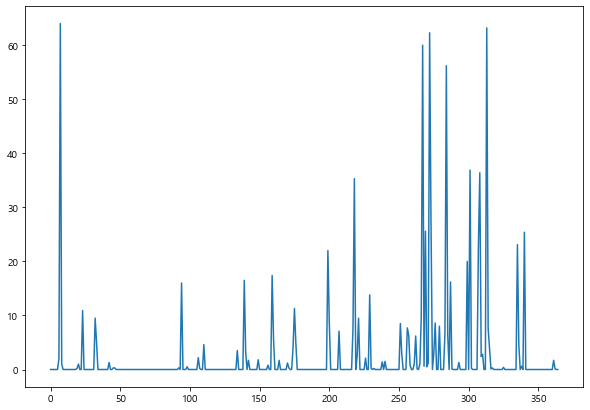

In [16]:
plt.figure(figsize=(10, 7))
weatherShop_allP['amount_of_rain'].plot()

Malgun Gothic


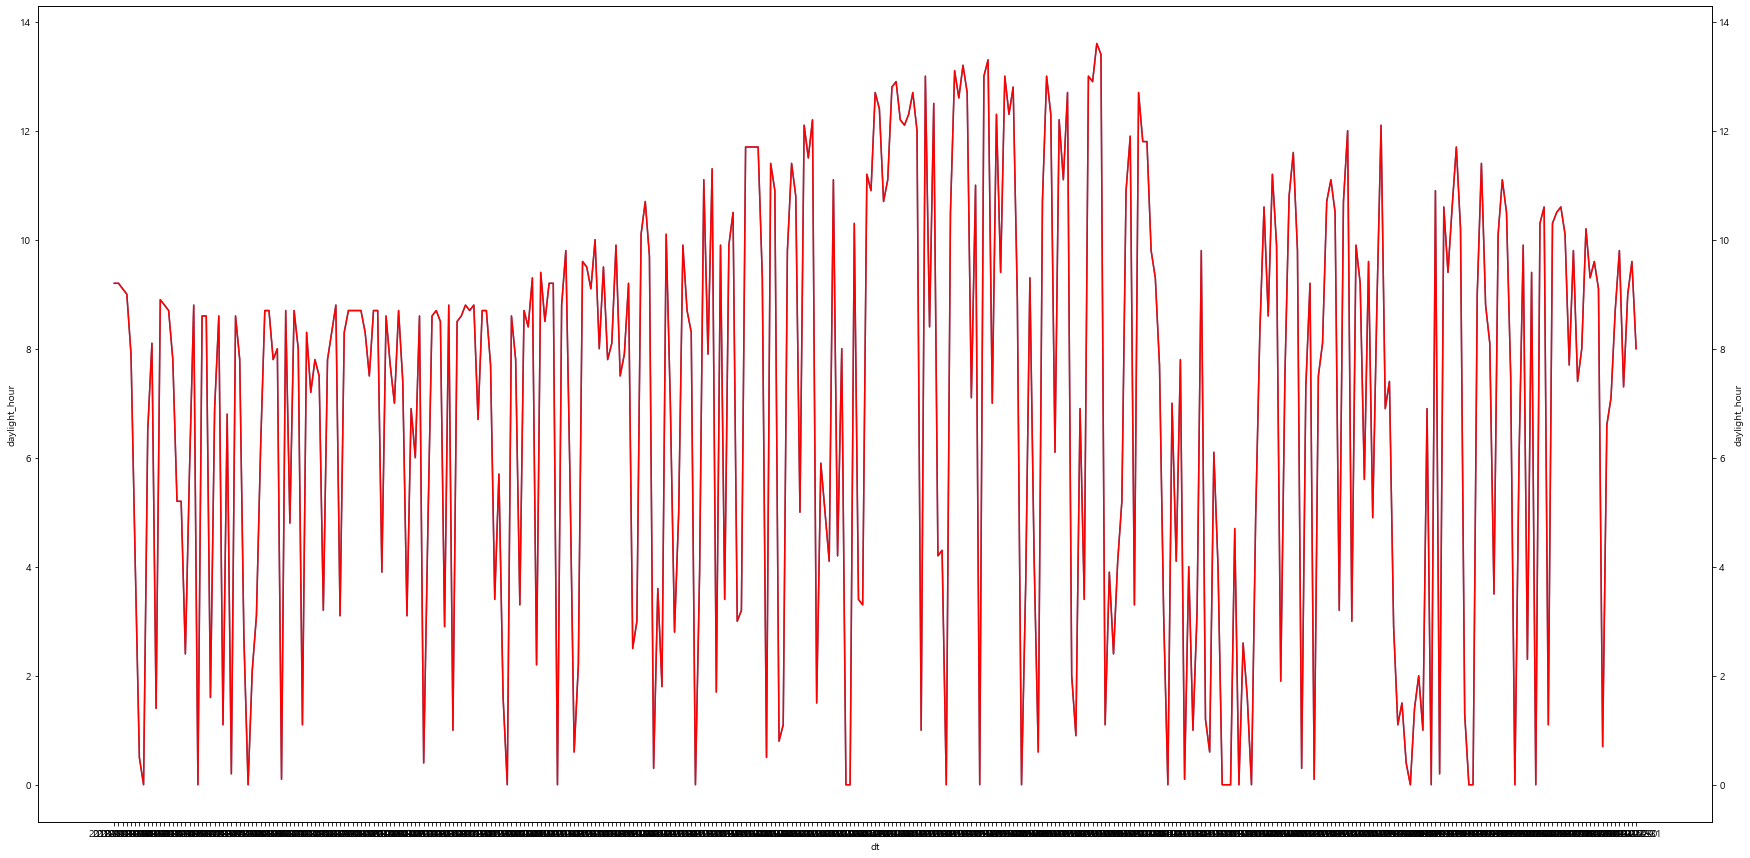

In [17]:


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "/usr/share/fonts/truetype/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
print(font_name)

fig, ax = plt.subplots(figsize=(30, 15))
sns.lineplot(x='dt', y=weatherShop_allP['daylight_hour'], data=weatherShop_allP, ax=ax)
ax2 = ax.twinx()
sns.lineplot(x='dt', y=weatherShop_allP['daylight_hour'], data=weatherShop_allP, ax=ax2, color='r')
plt.show()
weatherShop_allP[['dt', 'daylight_hour']].to_csv('./data/daylight_hour.csv')

In [40]:
# 강수량 bining
def get_category(amount_of_rain):
    cat = ''
    if amount_of_rain == 0: cat = 0
    elif amount_of_rain <=1: cat = 1
    elif amount_of_rain <=4: cat = 4
    elif amount_of_rain <=10: cat = 10
    else : cat = 11
    return cat

weatherShop_allP['wf_bin'] = weatherShop_allP['amount_of_rain'].apply(lambda x : get_category(x))

weatherShop_allP.groupby('wf_bin').count()

,city,dt,temp_avg,temp_min,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,...,화장품/미용 > 헤어케어,화장품/미용 > 헤어케어 > 두피케어,화장품/미용 > 헤어케어 > 린스,화장품/미용 > 헤어케어 > 샴푸,화장품/미용 > 헤어케어 > 탈모케어,화장품/미용 > 헤어케어 > 트리트먼트,화장품/미용 > 헤어케어 > 헤어미스트,화장품/미용 > 헤어케어 > 헤어에센스,화장품/미용 > 헤어케어 > 헤어케어세트,화장품/미용 > 헤어케어 > 헤어팩
wf_bin,,,,,,,,,,,,,,,,,,,,,
0,4066,4066,4066,4066,4066,4066,4066,4066,4066,4066,...,4066,4066,4066,4066,4066,4066,4066,4066,4066,4066
1,659,659,659,659,659,659,659,659,659,659,...,659,659,659,659,659,659,659,659,659,659
4,461,461,461,461,461,461,461,461,461,461,...,461,461,461,461,461,461,461,461,461,461
10,275,275,275,275,275,275,275,275,275,275,...,275,275,275,275,275,275,275,275,275,275
11,533,533,533,533,533,533,533,533,533,533,...,533,533,533,533,533,533,533,533,533,533


In [41]:
# 일조량 범주화
bin_names = [x for x in range(0, 9)]

# bins
count, bin_dividers = np.histogram(weatherShop_allP['daylight_hour'], bins=9)
print(count, bin_dividers) 


weatherShop_allP['dl_bin'] = pd.cut(x=weatherShop_allP['daylight_hour'],     # 데이터 배열
                      bins=bin_dividers,      # 경계 값 리스트
                      labels=bin_names,       # bin 이름
                      include_lowest=True)    # 첫 경계값 포함 


[ 990  415  452  503  692 1305  897  518  222] [ 0.          1.53333333  3.06666667  4.6         6.13333333  7.66666667
  9.2        10.73333333 12.26666667 13.8       ]


In [42]:
# 강수량, 일조량 범주별 평균
grouped_wf_bin = weatherShop_allP.groupby('wf_bin')
grouped_dl_bin = weatherShop_allP.groupby('dl_bin')

# grouped.agg('mean') 
grouped_wf_bin_mean = grouped_wf_bin.agg('mean')
grouped_dl_bin_mean = grouped_dl_bin.agg('mean')
display(grouped_wf_bin_mean)
display(grouped_dl_bin_mean)

,temp_avg,temp_min,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,vapor_pressure_avg,station_pressure_avg,...,화장품/미용 > 헤어케어,화장품/미용 > 헤어케어 > 두피케어,화장품/미용 > 헤어케어 > 린스,화장품/미용 > 헤어케어 > 샴푸,화장품/미용 > 헤어케어 > 탈모케어,화장품/미용 > 헤어케어 > 트리트먼트,화장품/미용 > 헤어케어 > 헤어미스트,화장품/미용 > 헤어케어 > 헤어에센스,화장품/미용 > 헤어케어 > 헤어케어세트,화장품/미용 > 헤어케어 > 헤어팩
wf_bin,,,,,,,,,,,,,,,,,,,,,
0,12.533571,5.780079,19.331948,0.000000,5.691490,1.898401,4.278775,61.240728,10.782833,1007.915519,...,67.507898,52.152582,63.923082,67.143935,48.303448,67.050270,33.403270,69.637658,44.358058,44.916912
1,14.385281,8.433080,20.563733,0.375721,6.601973,2.028073,8.654932,71.277086,14.222307,1003.759484,...,67.784446,55.314409,65.178046,66.387479,50.795965,67.075506,34.334622,68.939689,46.964659,46.453697
4,16.587636,11.566811,22.097397,2.183080,6.621475,2.038395,12.262907,77.900651,16.875271,1001.624078,...,68.062234,57.587159,66.159669,66.253523,53.541539,66.027672,35.323456,68.520143,47.755503,46.580224
10,17.636000,13.434909,22.552727,6.743273,6.368364,1.942909,14.274545,82.452364,18.122909,1000.407636,...,68.919029,58.314713,67.425460,65.976291,58.458545,66.663920,36.520571,68.046117,50.287896,46.816102
11,19.481614,16.032270,23.721576,31.829456,7.455535,2.334334,17.235647,88.231520,21.271670,999.259850,...,70.847931,64.203731,69.914062,66.752893,62.447918,68.159620,37.455695,69.769881,52.310909,48.660790


,temp_avg,temp_min,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,vapor_pressure_avg,station_pressure_avg,...,화장품/미용 > 헤어케어 > 두피케어,화장품/미용 > 헤어케어 > 린스,화장품/미용 > 헤어케어 > 샴푸,화장품/미용 > 헤어케어 > 탈모케어,화장품/미용 > 헤어케어 > 트리트먼트,화장품/미용 > 헤어케어 > 헤어미스트,화장품/미용 > 헤어케어 > 헤어에센스,화장품/미용 > 헤어케어 > 헤어케어세트,화장품/미용 > 헤어케어 > 헤어팩,wf_bin
dl_bin,,,,,,,,,,,,,,,,,,,,,
0,16.377980,12.705051,20.431010,15.531111,6.353939,2.010202,13.302121,83.650101,17.563232,1002.924242,...,57.838477,66.173778,67.310653,55.323619,67.002639,35.878692,68.838993,47.855745,46.418358,6.847475
1,14.620241,9.607711,20.079759,4.935422,6.244096,1.943133,10.009880,75.822169,15.172048,1004.162410,...,55.404083,66.233899,67.517173,52.459594,67.734634,35.038598,69.646105,47.735980,45.672377,3.204819
2,13.433407,7.759956,19.490044,2.215929,6.056637,1.848230,7.721460,70.953319,13.373673,1005.116372,...,52.604917,63.585898,66.732465,48.322628,66.548033,34.206015,68.671075,45.413463,45.143575,2.042035
3,13.342147,7.222266,19.704374,1.612724,6.326044,1.948310,7.158449,68.972167,13.103579,1005.333598,...,54.123012,65.937466,67.654736,48.593698,68.218336,34.562050,70.061560,45.918815,45.924602,1.646123
4,12.464306,5.879046,19.275000,0.647832,6.184249,1.926445,5.648988,66.373988,12.004769,1006.762717,...,53.904360,64.857311,68.567099,46.274294,68.418371,33.800433,70.145696,43.766977,46.306627,0.908960
5,9.197165,2.261379,16.226513,0.187280,5.884061,1.909349,0.711724,59.484215,9.118621,1009.875939,...,50.015812,62.571374,69.119455,42.225290,67.997549,33.087753,69.562986,42.070797,44.743892,0.304981
6,15.215496,8.390970,22.241360,0.132887,5.812932,1.995875,6.714047,61.012263,12.188071,1006.620847,...,56.804656,66.309183,65.946051,56.050575,67.108300,34.495358,71.391229,47.968126,46.374602,0.183946
7,17.968919,10.492664,25.342278,0.047876,5.879537,2.088224,8.255019,57.785328,13.065637,1003.504440,...,54.644788,64.671193,61.443353,59.352389,63.392378,32.728963,67.339675,48.745804,44.682919,0.123552
8,21.051802,13.263514,28.447748,0.000000,5.633333,2.094144,10.431982,55.532432,13.913514,1000.848649,...,55.058988,66.427875,60.995815,58.317834,62.963232,33.167825,65.276394,48.455877,44.762827,0.000000


In [43]:
grouped_wf_bin_mean = grouped_wf_bin_mean.reset_index()
grouped_wf_bin_mean['wf_bin'] = grouped_wf_bin_mean['wf_bin'].astype('int')

grouped_dl_bin_mean = grouped_dl_bin_mean.reset_index()
grouped_dl_bin_mean['dl_bin'] = grouped_dl_bin_mean['dl_bin'].astype('int')


In [44]:
# 필요 컬럼만 남김
grouped_wf_bin_mean.columns.tolist()

dropColList = ['temp_min', 'temp_max', 'amount_of_rain', 'wind_vel_max', 'wind_vel_avg', \
               'dewpoint_avg', 'r_humidity', 'vapor_pressure_avg', 'station_pressure_avg', 'sealevel_pressure_avg']

f_grouped_wf_bin_mean = grouped_wf_bin_mean.drop(dropColList, axis=1)
f_grouped_dl_bin_mean = grouped_dl_bin_mean.drop(dropColList, axis=1)


display(f_grouped_wf_bin_mean)
display(f_grouped_dl_bin_mean)

,wf_bin,temp_avg,daylight_hour,가구/인테리어,가구/인테리어 > DIY자재/용품,가구/인테리어 > DIY자재/용품 > 가구부속품,가구/인테리어 > DIY자재/용품 > 데코스티커,가구/인테리어 > DIY자재/용품 > 목재,가구/인테리어 > DIY자재/용품 > 몰딩,가구/인테리어 > DIY자재/용품 > 바닥재,...,화장품/미용 > 헤어케어,화장품/미용 > 헤어케어 > 두피케어,화장품/미용 > 헤어케어 > 린스,화장품/미용 > 헤어케어 > 샴푸,화장품/미용 > 헤어케어 > 탈모케어,화장품/미용 > 헤어케어 > 트리트먼트,화장품/미용 > 헤어케어 > 헤어미스트,화장품/미용 > 헤어케어 > 헤어에센스,화장품/미용 > 헤어케어 > 헤어케어세트,화장품/미용 > 헤어케어 > 헤어팩
0,0,12.533571,8.134998,72.710048,73.401218,70.115609,65.824957,74.863908,63.325889,62.582676,...,67.507898,52.152582,63.923082,67.143935,48.303448,67.050270,33.403270,69.637658,44.358058,44.916912
1,1,14.385281,5.109105,72.678227,73.133998,70.267016,65.222512,74.020366,63.351580,62.513874,...,67.784446,55.314409,65.178046,66.387479,50.795965,67.075506,34.334622,68.939689,46.964659,46.453697
2,4,16.587636,3.783948,72.328297,73.777991,71.314743,65.863159,75.236063,64.941409,63.631936,...,68.062234,57.587159,66.159669,66.253523,53.541539,66.027672,35.323456,68.520143,47.755503,46.580224
3,10,17.636000,2.102182,72.343902,74.864781,72.921619,66.181606,77.459364,66.985328,65.539884,...,68.919029,58.314713,67.425460,65.976291,58.458545,66.663920,36.520571,68.046117,50.287896,46.816102
4,11,19.481614,1.199625,74.816502,76.622580,74.917783,65.827768,78.376587,68.598858,66.500233,...,70.847931,64.203731,69.914062,66.752893,62.447918,68.159620,37.455695,69.769881,52.310909,48.660790


,dl_bin,temp_avg,daylight_hour,가구/인테리어,가구/인테리어 > DIY자재/용품,가구/인테리어 > DIY자재/용품 > 가구부속품,가구/인테리어 > DIY자재/용품 > 데코스티커,가구/인테리어 > DIY자재/용품 > 목재,가구/인테리어 > DIY자재/용품 > 몰딩,가구/인테리어 > DIY자재/용품 > 바닥재,...,화장품/미용 > 헤어케어 > 두피케어,화장품/미용 > 헤어케어 > 린스,화장품/미용 > 헤어케어 > 샴푸,화장품/미용 > 헤어케어 > 탈모케어,화장품/미용 > 헤어케어 > 트리트먼트,화장품/미용 > 헤어케어 > 헤어미스트,화장품/미용 > 헤어케어 > 헤어에센스,화장품/미용 > 헤어케어 > 헤어케어세트,화장품/미용 > 헤어케어 > 헤어팩,wf_bin
0,0,16.377980,0.412121,74.376563,75.553548,72.920717,67.179918,77.110783,66.489506,65.518584,...,57.838477,66.173778,67.310653,55.323619,67.002639,35.878692,68.838993,47.855745,46.418358,6.847475
1,1,14.620241,2.287229,73.392980,74.182752,71.457274,66.410213,75.461959,64.736352,63.519366,...,55.404083,66.233899,67.517173,52.459594,67.734634,35.038598,69.646105,47.735980,45.672377,3.204819
2,2,13.433407,3.847345,71.895180,72.976096,69.694352,66.258088,74.504175,63.881745,62.389010,...,52.604917,63.585898,66.732465,48.322628,66.548033,34.206015,68.671075,45.413463,45.143575,2.042035
3,3,13.342147,5.438966,73.150782,73.684456,70.625258,66.208053,74.797665,64.361386,62.690834,...,54.123012,65.937466,67.654736,48.593698,68.218336,34.562050,70.061560,45.918815,45.924602,1.646123
4,4,12.464306,6.965173,73.986750,74.113976,70.521235,66.788069,74.412535,63.922978,62.987863,...,53.904360,64.857311,68.567099,46.274294,68.418371,33.800433,70.145696,43.766977,46.306627,0.908960
5,5,9.197165,8.500920,73.825450,73.295293,69.162723,66.563054,73.580900,62.105695,61.960550,...,50.015812,62.571374,69.119455,42.225290,67.997549,33.087753,69.562986,42.070797,44.743892,0.304981
6,6,15.215496,9.929989,73.814025,74.704401,72.042765,65.031485,75.900998,64.396104,64.018967,...,56.804656,66.309183,65.946051,56.050575,67.108300,34.495358,71.391229,47.968126,46.374602,0.183946
7,7,17.968919,11.448456,67.571567,70.835108,69.564959,61.435420,75.969721,63.071463,61.815637,...,54.644788,64.671193,61.443353,59.352389,63.392378,32.728963,67.339675,48.745804,44.682919,0.123552
8,8,21.051802,12.714414,65.371511,71.225076,70.581359,61.785518,76.704413,65.308203,61.312285,...,55.058988,66.427875,60.995815,58.317834,62.963232,33.167825,65.276394,48.455877,44.762827,0.000000


In [45]:
f_grouped_wf_bin_mean_corr = f_grouped_wf_bin_mean.corr()
f_grouped_dl_bin_mean_corr = f_grouped_dl_bin_mean.corr()

# f_grouped_wf_bin_mean_corr.to_csv("./data/f_grouped_wf_bin_mean_corr.csv")
# f_grouped_dl_bin_mean_corr.to_csv("./data/f_grouped_dl_bin_mean_corr.csv")

In [46]:
dropColList = ['city','temp_min', 'temp_max', 'amount_of_rain', 'wind_vel_max', 'wind_vel_avg', 'daylight_hour', \
               'dewpoint_avg', 'r_humidity', 'vapor_pressure_avg', 'station_pressure_avg', 'sealevel_pressure_avg']
f_weathervsproduct = weatherShop_allP.drop(dropColList, axis = 1)
print(f_weathervsproduct[['dl_bin', 'wf_bin']].groupby('wf_bin').count())
print(f_weathervsproduct[['dl_bin', 'wf_bin']].groupby('dl_bin').count())

        dl_bin
wf_bin        
0         4066
1          659
4          461
10         275
11         533
        wf_bin
dl_bin        
0          990
1          415
2          452
3          503
4          692
5         1305
6          897
7          518
8          222


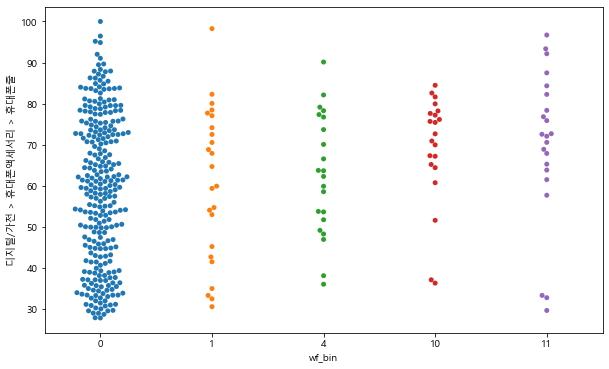

In [25]:
# 강수량에 따른 클릭율 변화
fig, ax = plt.subplots(figsize=(10,6))
sns.swarmplot(x="wf_bin",        #x축 변수
              y="디지털/가전 > 휴대폰액세서리 > 휴대폰줄",        #y축 변수
              data=f_weathervsproduct)      
plt.show()

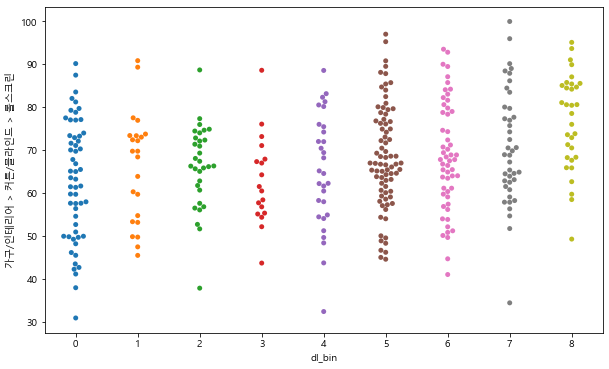

In [26]:
# 일조량에 따른 클릭율 변화
fig, ax = plt.subplots(figsize=(10,6))
sns.swarmplot(x="dl_bin",        #x축 변수
              y="가구/인테리어 > 커튼/블라인드 > 롤스크린",        #y축 변수
              data=f_weathervsproduct)      
plt.show()

In [47]:
# import numpy as np
# from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer

# one_hot = LabelBinarizer()
# one_hot.fit_transform(f_weathervsproduct.wf_bin)
# one_hot.classes_

dummy_wf_bin = pd.get_dummies(f_weathervsproduct.wf_bin)
# dummy_wf_bin.columns = ['wf0', 'wf1', 'wf4', 'wf10', 'wf11']
dummy_wf_bin.columns = ['wf0', 'wf1', 'wf4', 'wf10', 'wf11']

dummy_dl_bin = pd.get_dummies(f_weathervsproduct.dl_bin)
dummy_dl_bin.columns = ['dl'+ str(z) for z in range(0,9)]



In [48]:
f_weathervsproduct_d = pd.concat([dummy_wf_bin, dummy_dl_bin, f_weathervsproduct], axis=1)
# f_weathervsproduct_d.loc[:,['wf0', 'wf1', 'wf4', 'wf10', 'wf11', 'wf_bin']]

In [49]:
# 주말처리 토일월과 그외

import datetime
import time

# 0:월 5:토 6:일
def get_week(dt):
    cat = ''
    if pd.to_datetime(dt).weekday() == 5 : cat = 1
    elif pd.to_datetime(dt).weekday() == 6 : cat = 1
    elif pd.to_datetime(dt).weekday() == 4 : cat = 1
    elif pd.to_datetime(dt).weekday() == 0 : cat = 1        
    else : cat = 0
    return cat

f_weathervsproduct_d['wk_bin'] = f_weathervsproduct_d['dt'].apply(lambda x : get_week(x))
f_weathervsproduct_d[['dt','wk_bin']]


dummy_wk_bin = pd.get_dummies(f_weathervsproduct_d.wk_bin)
dummy_wk_bin.columns = ['wk'+ str(z) for z in range(0,2)]
dummy_wk_bin
f_weathervsproduct_d = pd.concat([f_weathervsproduct_d, dummy_wk_bin], axis=1)

In [50]:
# f_weathervsproduct_d.columns.tolist()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

xlist = ['wf0', 'wf1', 'wf4', 'wf10', 'wf11', 'dl0', 'dl1', 'dl2', 'dl3', 'dl4', 'dl5', 'dl6', 'dl7', 'dl8', 'temp_avg', 'wk0', 'wk1']
# xlist = ['wf0', 'wf1', 'wf4', 'wf10', 'wf11', 'temp_avg']
# xlist = ['dl0', 'dl1', 'dl2', 'dl3', 'dl4', 'dl5', 'dl6', 'dl7', 'dl8', 'temp_avg']
X=f_weathervsproduct_d[xlist]
y=f_weathervsproduct_d["스포츠/레저 > 자전거 > 자전거용품"]


# 설명 변수 데이터를 정규화(normalization)
# from sklearn import preprocessing
# X = preprocessing.StandardScaler().fit(X).transform(X)

# (1) train, test 구분
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)   
 

훈련 데이터:  (255, 17)
검증 데이터:  (110, 17)


In [32]:
# (2) 다중회귀분석 모형
lr = LinearRegression()  
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print('결정계수(R-제곱): ', r_square)
# 회귀식의 기울기
print('X 변수의 계수 a: ', lr.coef_)

# 회귀식의 y절편
print('상수항 b: ', lr.intercept_)

결정계수(R-제곱):  0.7807670877080275
X 변수의 계수 a:  [ 0.15455169 -0.25263675 -1.5707661   0.86326973  0.80558143 -1.45036128
 -1.57473182  2.39884099 -4.24578696 -4.55897627 -4.0731322   3.1454876
  5.29077823  5.06788172  1.9076938   0.83023974 -0.83023974]
상수항 b:  28.623902691093306


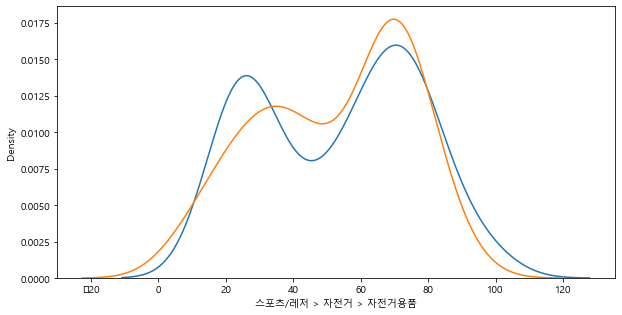

In [33]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat = lr.predict(X_test)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y_test, hist=False, label="y_test")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def runLinearRegression(xlist, data): 
    df = pd.DataFrame()
    ydata = data.drop(xlist + ['dt', 'wf_bin', 'dl_bin', 'wk_bin'], axis=1)
    
    for colname in ydata.columns.tolist():

        X=data[xlist]
        y=data[colname]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

        lr = LinearRegression()  
        lr.fit(X_train, y_train)

        r_square = lr.score(X_test, y_test)
#         print('[' + colname + '])
#         print('[' + colname + ']', '결정계수(R-제곱) :', r_square, '상수항 b: ', lr.intercept_)
#         print('X 변수의 계수 a: ', lr.coef_)
        df = df.append({'productName' : colname , 'R_square' : r_square, 'Xa' : lr.coef_, 'b' : lr.intercept_} , ignore_index=True)
    return df





xlist = ['wf0', 'wf1', 'wf4', 'wf10', 'wf11', 'dl0', 'dl1', 'dl2', 'dl3', 'dl4', 'dl5', 'dl6', 'dl7', 'dl8', 'temp_avg', 'wk0', 'wk1']

allrunLinearRegression = runLinearRegression(xlist, f_weathervsproduct_d)
allrunLinearRegression.to_csv("./data/allrunLinearRegression_2019.csv")


In [65]:
print(allrunLinearRegression.Xa[0][1])

1.1132437065793717


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

# 컬럼별 정규화 함수
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

# 회귀실행 및 결정계수 저장
def runLinearRegression(vCity, shiftln, groupR, mergedrv, rCorr): 
    result = pd.DataFrame()
    # display(mergedrv)
    for rv in rCorr.index.tolist():

        X=mergedrv[rCorr.columns.tolist()].reset_index().drop('datetime', axis=1)
        y=mergedrv[rv].reset_index().drop('datetime', axis=1)
        # display(X)
        # display(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

        lr = LinearRegression()  
        lr.fit(X_train, y_train)

        r_square = lr.score(X_test, y_test)

        result = result.append({'City' : vCity , 'Response' : rv,'shiftrow' : shiftln ,'grouprow' : groupR , 'R_square' : r_square, \
                                'Xa' : lr.coef_, 'b' : lr.intercept_, 'dvList' : rCorr.columns.tolist()} , ignore_index=True)
        # print(result)
    return result


# 함수
def runCorrLR(df, cityLst, dependentVslst, responseVsLst, shiftGap, groupGap):
    result = pd.DataFrame()
    # 1. df에서 도시별로 실행
    for vCity in cityLst:
        
        tmpdf = df[df['city'] == vCity]
        # 종속변수 df (표준화실행)
        dvdf = normalize(tmpdf[dependentVslst])
        # 반응변수 df (표준화실행)
        rvdf = normalize(tmpdf[responseVsLst])
        
        # 2. shift실행
        for shiftln in range(0, shiftGap):
            dvdf.sort_index()
            
            # 3. 컬럼별로 shift
            for d in dependentVslst :
                dvdf['sft_' + d]  = dvdf[d].shift(- shiftln)

            dvdf.drop(dependentVslst, axis=1)
            # shift로 생긴 na제거
            dvdf = dvdf.dropna(how='any',axis=0) 
            
            
            # 4. 범위로 group 묶기
            for groupln in range(1, groupGap + 1): 
                groupR = str(groupln) + 'D'
                gdvdf = dvdf[dependentVslst].resample(groupR).sum()
                grvdf = rvdf[responseVsLst].resample(groupR).mean()


                mergedrv = pd.merge(gdvdf, grvdf, left_index=True, right_index=True, how='left')
                # print(vCity, shiftln, groupR)
                rCorr = mergedrv.corr().loc[responseVsLst][dependentVslst]
                # display(mergedrv.corr().loc[responseVsLst][dependentVslst])
                rResult = runLinearRegression(vCity, shiftln, groupR, mergedrv, rCorr)
                result = result.append(rResult)
                # print(rCorr.index)
    return(result)


In [ ]:
# testdf = weatherDis[weatherDis['city'].isin(['서울특별시', '강원도'])]
testdf = weatherDis
# cityLst = ['서울특별시', '강원도']
cityLst = [ '서울특별시',  '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '경기도', \
                       '강원도',  '충청북도',  '충청남도',  '전라북도', '전라남도', '경상북도', '경상남도', '제주도', '세종특별자치시']
dependentVslst = ['temp_avg', 'amount_of_rain', 'r_humidity']
responseVsLst = ['A형간염', 'C형간염', '성홍열', '수두', '유행성이하선염(볼거리)', '쯔쯔가무시', \
                   '카바페넴내성장내세균속균종(CRE)감염증']
shiftGapD = 7
groupGapD = 7


testdf['datetime'] = testdf['dt_x'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
testdf.set_index(testdf['datetime'], inplace=True)
testdf = testdf.drop('datetime', 1)

saveList = runCorrLR(testdf, cityLst, dependentVslst, responseVsLst, shiftGapD, groupGapD)

# print(saveList)
saveList.to_csv("./data/naverRsqareList.csv")
# ㅋㅋ 17city * 7shift * 7group * 7반응 = 5931

In [71]:
cols = f_weathervsproduct_d.columns
display(cols)
pd.DataFrame(cols).to_csv("./data/navercols.csv")

Index(['wf0', 'wf1', 'wf4', 'wf10', 'wf11', 'dl0', 'dl1', 'dl2', 'dl3', 'dl4',
       ...
       '화장품/미용 > 헤어케어 > 트리트먼트', '화장품/미용 > 헤어케어 > 헤어미스트',
       '화장품/미용 > 헤어케어 > 헤어에센스', '화장품/미용 > 헤어케어 > 헤어케어세트',
       '화장품/미용 > 헤어케어 > 헤어팩', 'wf_bin', 'dl_bin', 'wk_bin', 'wk0', 'wk1'],
      dtype='object', length=2468)

SVR()
결정계수(R-제곱):  0.827976270567556
SGDRegressor()
결정계수(R-제곱):  0.4251914443220207
BayesianRidge()
결정계수(R-제곱):  0.7872475597100136
LassoLars()
결정계수(R-제곱):  0.33742670403299435
ARDRegression()
결정계수(R-제곱):  0.7858745052942466
PassiveAggressiveRegressor()
결정계수(R-제곱):  0.04279333532937779
TheilSenRegressor(max_subpopulation=10000)
결정계수(R-제곱):  0.7814937090054836
LinearRegression()
결정계수(R-제곱):  0.7807670877080275


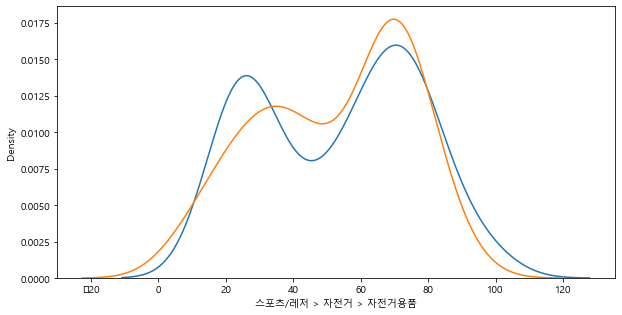

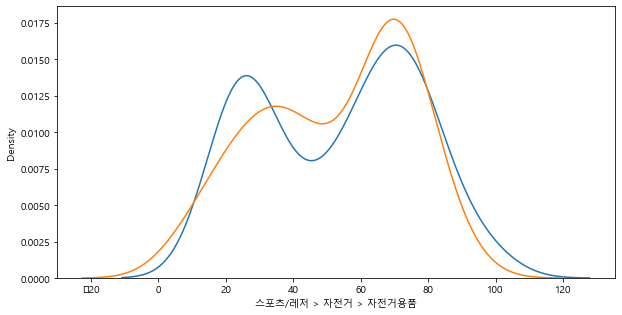

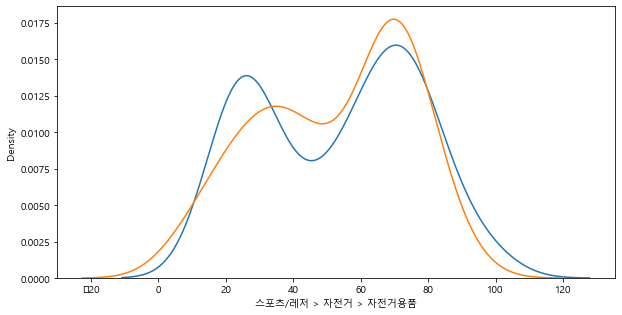

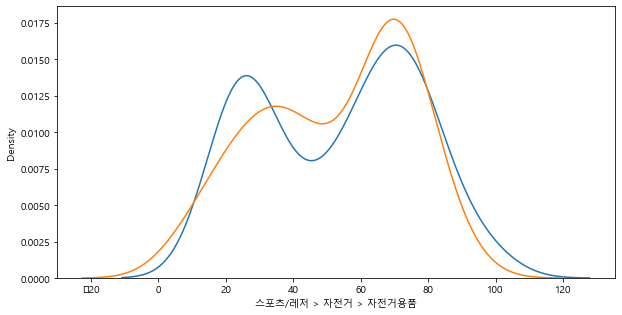

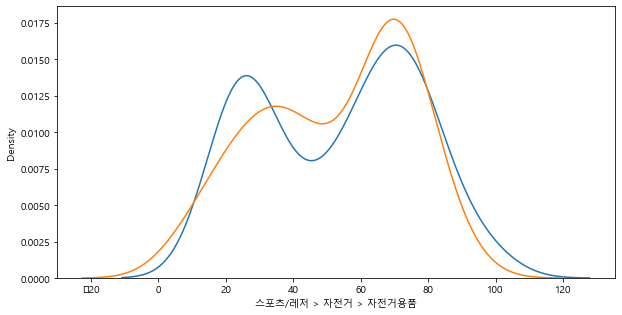

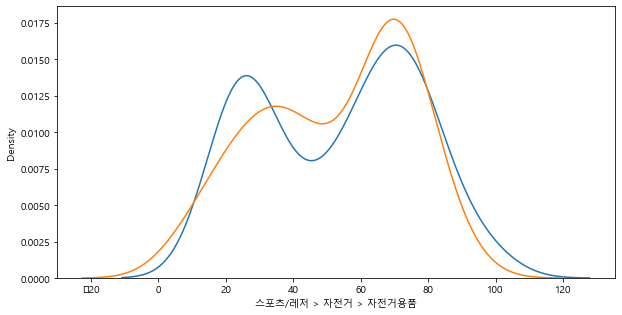

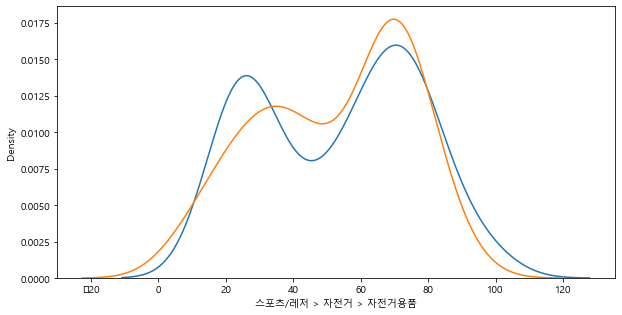

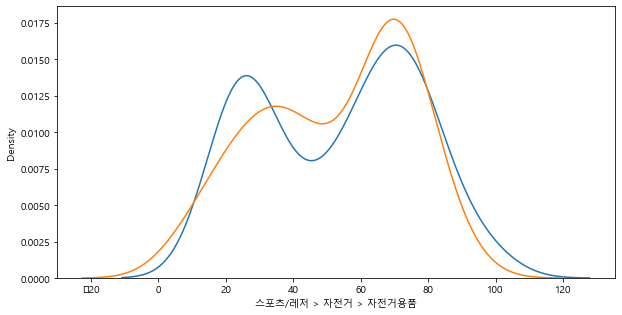

In [66]:
import numpy as np
from sklearn import linear_model
from sklearn import svm

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]

trainingData    = X_train
trainingScores  = y_train
predictionData  = X_test

for item in classifiers:
    print(item)
    clf = item
    clf.fit(trainingData, trainingScores)
    # print(clf.predict(predictionData),'\n')
    r_square = clf.score(X_test, y_test)
    print('결정계수(R-제곱): ', r_square)
    
    y_hat = lr.predict(X_test)

    plt.figure(figsize=(10, 5))
    ax1 = sns.distplot(y_test, hist=False, label="y_test")
    ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()
plt.close()    